In [463]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [3]:
%matplotlib inline
le = LabelEncoder()


In [4]:
import geopandas as gpd
from dbfread import DBF

In [55]:
census = pd.read_csv('new_york_tree_census_2015.csv')
census.head(5)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


In [278]:
nta = pd.read_csv('nynta.csv')
nta

,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.94732672160586 40.62916656...,3,Brooklyn,47,BK43,Midwood,"27,996.5912736","35,799,637.8103"
1,MULTIPOLYGON (((-73.94193078816201 40.70072523...,3,Brooklyn,47,BK75,Bedford,"29,992.9191744","32,629,833.1149"
2,MULTIPOLYGON (((-73.89138023380268 40.86170058...,2,Bronx,5,BX40,Fordham South,"15,878.2729212","6,307,283.62202"
3,MULTIPOLYGON (((-73.9760493559142 40.631275905...,3,Brooklyn,47,BK88,Borough Park,"39,247.227722","54,005,019.2286"
4,MULTIPOLYGON (((-73.90855790522774 40.65209593...,3,Brooklyn,47,BK96,Rugby-Remsen Village,"30,957.8533949","32,706,946.4035"
...,...,...,...,...,...,...,...,...
190,MULTIPOLYGON (((-73.91191812320277 40.84325788...,2,Bronx,5,BX63,West Concourse,"28,550.7003701","19,369,542.2241"
191,MULTIPOLYGON (((-73.83103141767994 40.71433672...,4,Queens,81,QN17,Forest Hills,"36,183.6078275","57,828,447.5721"
192,MULTIPOLYGON (((-73.86522555434871 40.57045847...,4,Queens,81,QN99,park-cemetery-etc-Queens,"490,146.60402","311,684,971.61"
193,MULTIPOLYGON (((-73.75763129618157 40.66645115...,4,Queens,81,QN03,Springfield Gardens South-Brookville,"45,266.2678751","43,263,751.4662"


In [279]:
nta = nta.rename(columns={'NTACode': "nta"})

In [280]:
df = pd.merge(census, nta, on='nta')
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.805180,1.038250e+06,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,3,Quercus palustris,pin oak,...,-73.823070,1.033289e+06,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,3,Carpinus betulus,European hornbeam,...,-73.819915,1.034165e+06,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,3,Quercus phellos,willow oak,...,-73.813822,1.035854e+06,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.822124,1.033559e+06,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,72105,233703,2015-07-16,3,0,OnCurb,Alive,3,Ulmus parvifolia,Chinese elm,...,-73.968578,9.929788e+05,149536.9379,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683784,374586,207854,2015-10-25,7,0,OnCurb,Alive,3,Ginkgo biloba,ginkgo,...,-73.972550,9.918752e+05,149810.4245,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683785,70230,233694,2015-07-16,12,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.974235,9.914071e+05,150564.7042,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683786,442173,207376,2015-11-09,12,0,OnCurb,Alive,3,Quercus rubra,northern red oak,...,-73.967607,9.932480e+05,151239.2005,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"


In [281]:
ntas = pd.DataFrame(df.groupby('nta')['tree_id'].count())
ntas1 = ntas.reset_index()
ntas2 = ntas1.rename(columns={'tree_id':'tree counts'})
ntas3 = pd.merge(nta, ntas2, on='nta')
ntas3
#ntas3['tree_density'] = ntas3['tree counts'].div(ntas3["Shape_Area"].values)

,the_geom,BoroCode,BoroName,CountyFIPS,nta,NTAName,Shape_Leng,Shape_Area,tree counts
0,MULTIPOLYGON (((-73.94732672160586 40.62916656...,3,Brooklyn,47,BK43,Midwood,"27,996.5912736","35,799,637.8103",4860
1,MULTIPOLYGON (((-73.94193078816201 40.70072523...,3,Brooklyn,47,BK75,Bedford,"29,992.9191744","32,629,833.1149",3702
2,MULTIPOLYGON (((-73.89138023380268 40.86170058...,2,Bronx,5,BX40,Fordham South,"15,878.2729212","6,307,283.62202",1060
3,MULTIPOLYGON (((-73.9760493559142 40.631275905...,3,Brooklyn,47,BK88,Borough Park,"39,247.227722","54,005,019.2286",5955
4,MULTIPOLYGON (((-73.90855790522774 40.65209593...,3,Brooklyn,47,BK96,Rugby-Remsen Village,"30,957.8533949","32,706,946.4035",3312
...,...,...,...,...,...,...,...,...,...
183,MULTIPOLYGON (((-73.93139355315769 40.84742823...,1,Manhattan,61,MN36,Washington Heights South,"22,096.3050294","23,100,222.7507",2990
184,MULTIPOLYGON (((-73.91728719351073 40.84510408...,2,Bronx,5,BX26,Highbridge,"18,507.4239276","16,457,230.3638",1979
185,MULTIPOLYGON (((-73.91191812320277 40.84325788...,2,Bronx,5,BX63,West Concourse,"28,550.7003701","19,369,542.2241",2142
186,MULTIPOLYGON (((-73.83103141767994 40.71433672...,4,Queens,81,QN17,Forest Hills,"36,183.6078275","57,828,447.5721",7701


In [296]:
ntas3['Shape_Area'] = df['Shape_Area'].apply(lambda x: float(x.split()[0].replace(',', '')))
ntas3['tree density'] = ntas3['tree counts']/ntas3['Shape_Area']
nta_final = ntas3

(array([ 31616.,      0.,      0.,  26818.,      0.,      0.,  96504.,
             0.,      0., 528850.]),
 array([0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998,
        2.1, 2.4, 2.6999999999999997, 3.0], dtype=object),
 <BarContainer object of 10 artists>)

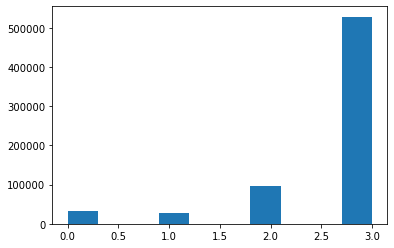

In [119]:
df.loc[df["health"] == "Poor", "health"] = 1
df.loc[df["health"] == "Fair", "health"] = 2
df.loc[df["health"] == "Good", "health"] = 3
df.loc[df["health"].isnull(), "health"] = 0

plt.hist(df['health'])

/Users/christinegao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tree_dbh'>

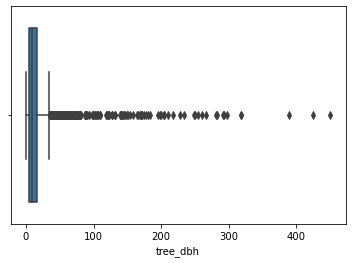

In [120]:
sns.boxplot(df['tree_dbh'])

## Cleaning Tree Diameter

For our analysis, we will investigate only the live trees.

In [121]:
## Removal of dead and stumps 

df1 = df[df["status"].str.contains("Dead|Stump")==False]
df1

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,longitude,x_sp,y_sp,the_geom,BoroCode,BoroName,CountyFIPS,NTAName,Shape_Leng,Shape_Area
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.805180,1.038250e+06,203232.9417,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
1,679996,307398,2016-08-25,4,0,OnCurb,Alive,3,Quercus palustris,pin oak,...,-73.823070,1.033289e+06,204501.9562,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
2,680506,307388,2016-08-25,4,0,OnCurb,Alive,3,Carpinus betulus,European hornbeam,...,-73.819915,1.034165e+06,203462.1729,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
3,691878,305754,2016-09-01,17,0,OffsetFromCurb,Alive,3,Quercus phellos,willow oak,...,-73.813822,1.035854e+06,203506.7804,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
4,692503,307786,2016-09-01,15,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.822124,1.033559e+06,200722.5845,MULTIPOLYGON (((-73.81497208257481 40.73856071...,4,Queens,81,Kew Gardens Hills,"33,109.3220103","37,891,124.4813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,72105,233703,2015-07-16,3,0,OnCurb,Alive,3,Ulmus parvifolia,Chinese elm,...,-73.968578,9.929788e+05,149536.9379,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683784,374586,207854,2015-10-25,7,0,OnCurb,Alive,3,Ginkgo biloba,ginkgo,...,-73.972550,9.918752e+05,149810.4245,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683785,70230,233694,2015-07-16,12,0,OnCurb,Alive,3,Fraxinus pennsylvanica,green ash,...,-73.974235,9.914071e+05,150564.7042,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"
683786,442173,207376,2015-11-09,12,0,OnCurb,Alive,3,Quercus rubra,northern red oak,...,-73.967607,9.932480e+05,151239.2005,MULTIPOLYGON (((-73.9688899587795 40.575261238...,3,Brooklyn,47,West Brighton,"14,114.5370571","8,745,781.98734"


In [163]:
df1['nta']

0         QN37
1         QN37
2         QN37
3         QN37
4         QN37
          ... 
683783    BK23
683784    BK23
683785    BK23
683786    BK23
683787    BK23
Name: nta, Length: 652173, dtype: object

(array([6.82694e+05, 1.01700e+03, 2.80000e+01, 2.20000e+01, 1.00000e+01,
        7.00000e+00, 5.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.]),
 <BarContainer object of 10 artists>)

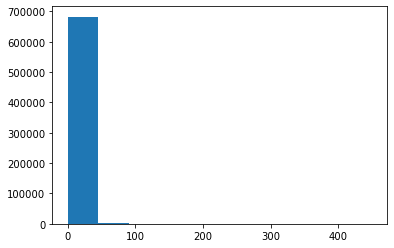

In [122]:
plt.hist(df1['tree_dbh'])

In [124]:
lower = df1['tree_dbh'].quantile(0.01)
upper = df1['tree_dbh'].quantile(0.99)

df2 = df1[(df1['tree_dbh'] < upper) & (df1['tree_dbh'] > lower)]

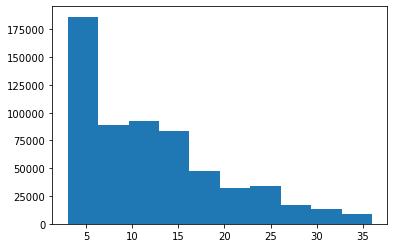

In [283]:
## New histogram omitting outliers within a 98% range
plt.hist(df2['tree_dbh'])

census_clean=df2

In [140]:
## tree equity score data
# table = DBF('ny.dbf')
# tes = pd.DataFrame(table)
# tes

In [142]:
#tes['congressio']

In [141]:
# tes['pctpoc'] #percentage people of color

# np.corrcoef(tes['treecanopy'], tes['tesctyscor'])

## NY NTA 2020 Census Data

In [155]:
xls = pd.ExcelFile('demo_2015acs5yr_nta.xlsx')
xls1 = pd.ExcelFile('econ_2015acs5yr_nta.xlsx')
xls2 = pd.ExcelFile('hous_2015acs5yr_nta.xlsx')
xls3 = pd.ExcelFile('soc_2015acs5yr_nta.xlsx')

In [156]:
demdata = pd.read_excel(xls, 'DemData')
econdata = pd.read_excel(xls1, 'EconData')
housdata = pd.read_excel(xls2, 'HousData')
socdata = pd.read_excel(xls3, 'SocData')

In [186]:
soc = socdata[['GeoID', 'EA_LTHSGrE', 'EA_LTHSGrP', 'EA_BchDHE', 'EA_BchDHP']]
soc = soc.rename(columns={'GeoID':'nta', 'EA_LTHSGrE': "Less than HS Grad Estimate", "EA_LTHSGrP": "Less than HS Grad Percent", 
                   'EA_BchDHE': 'Bachelor or Higher Estimate', 'EA_BchDHP':'Bachelor or Higher Percent'})

In [187]:
econ = econdata[['GeoID', 'MdHHIncE']]
econ = econ.rename(columns={'GeoID':'nta', 'MdHHIncE':'Median HH Income Estimate'})

In [188]:
hous = housdata[['GeoID', 'Borough', 'MdVlE']]
hous = hous.rename(columns={'GeoID':'nta', 'MdVlE':'Median House Value Estimate'})

In [191]:
nta_df = pd.merge(soc, econ, on='nta')
nta_df1 = pd.merge(nta_df, hous, on='nta')

In [192]:
nta_df1

,nta,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Median HH Income Estimate,Borough,Median House Value Estimate
0,BK27,5461,23.3,7597,32.4,55681.0,Brooklyn,647778.0
1,BK31,8157,13.6,27234,45.4,61389.0,Brooklyn,644029.0
2,BK75,9494,22.2,12300,28.8,36737.0,Brooklyn,654007.0
3,BK29,12368,26.8,13256,28.7,48508.0,Brooklyn,630095.0
4,BK28,19049,29.0,16407,25.0,48812.0,Brooklyn,676633.0
...,...,...,...,...,...,...,...,...
190,BX63,8129,36.0,3116,13.8,25893.0,The Bronx,249073.0
191,BX08,8847,38.2,2489,10.7,28884.0,The Bronx,426773.0
192,BX59,4482,25.5,3166,18.0,42528.0,The Bronx,419169.0
193,BX44,8659,21.5,7206,17.9,39808.0,The Bronx,377741.0


In [284]:
master = pd.merge(census_clean, nta_df1, on='nta')
master1 = master[['nta', 'tree_dbh', 'Less than HS Grad Estimate', 'Less than HS Grad Percent', 'Bachelor or Higher Estimate',
                 'Bachelor or Higher Percent', 'Median HH Income Estimate', 'Borough', 'Median House Value Estimate', 'health']]

In [303]:
master2 = master1.groupby('nta').mean()
master2 = master2.reset_index()

In [304]:
master2

,nta,tree_dbh,Less than HS Grad Estimate,Less than HS Grad Percent,Bachelor or Higher Estimate,Bachelor or Higher Percent,Median HH Income Estimate,Median House Value Estimate
0,BK09,12.254381,468.0,2.5,14302.0,77.3,102850.0,732992.0
1,BK17,15.354918,6482.0,13.8,18509.0,39.3,51203.0,472474.0
2,BK19,12.943970,3131.0,12.5,10431.0,41.8,33934.0,542894.0
3,BK21,7.319597,5877.0,30.0,4324.0,22.0,23005.0,421143.0
4,BK23,12.157895,771.0,5.7,6386.0,47.6,38805.0,274360.0
...,...,...,...,...,...,...,...,...
183,SI36,12.559972,2147.0,12.2,5072.0,28.9,64592.0,435556.0
184,SI37,8.826674,3266.0,18.4,4454.0,25.1,55408.0,365025.0
185,SI45,16.106031,1392.0,9.5,4582.0,31.1,74432.0,429999.0
186,SI48,10.149614,1539.0,8.4,6094.0,33.4,83032.0,420163.0


In [433]:
demo_tree_nta = nta_final.merge(master2, on='nta')
demo_tree_nta = demo_tree_nta.dropna()

(array([53., 56., 22., 25., 12.,  9.,  5.,  3.,  1.,  1.]),
 array([  468. ,  2935.7,  5403.4,  7871.1, 10338.8, 12806.5, 15274.2,
        17741.9, 20209.6, 22677.3, 25145. ]),
 <BarContainer object of 10 artists>)

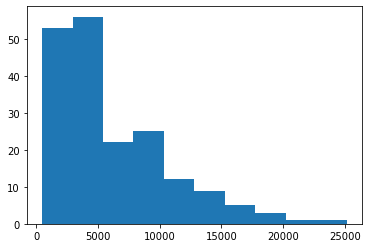

In [434]:
plt.hist(demo_tree_nta['Less than HS Grad Estimate'])

(array([108.,  47.,  17.,   5.,   3.,   4.,   2.,   0.,   0.,   1.]),
 array([ 1142. ,  8833.7, 16525.4, 24217.1, 31908.8, 39600.5, 47292.2,
        54983.9, 62675.6, 70367.3, 78059. ]),
 <BarContainer object of 10 artists>)

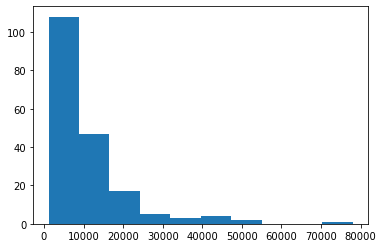

In [435]:
plt.hist(demo_tree_nta['Bachelor or Higher Estimate'])

(array([31., 42., 45., 32., 22.,  5.,  5.,  4.,  0.,  1.]),
 array([ 20314. ,  34314.9,  48315.8,  62316.7,  76317.6,  90318.5,
        104319.4, 118320.3, 132321.2, 146322.1, 160323. ]),
 <BarContainer object of 10 artists>)

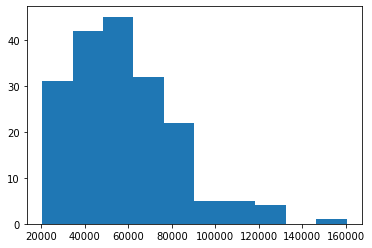

In [436]:
plt.hist(demo_tree_nta['Median HH Income Estimate'])

(array([ 6., 69., 63., 37.,  7.,  3.,  0.,  0.,  0.,  2.]),
 array([  37572. ,  233814.8,  430057.6,  626300.4,  822543.2, 1018786. ,
        1215028.8, 1411271.6, 1607514.4, 1803757.2, 2000000. ]),
 <BarContainer object of 10 artists>)

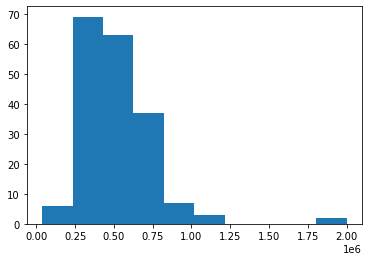

In [437]:
plt.hist(demo_tree_nta['Median House Value Estimate'])

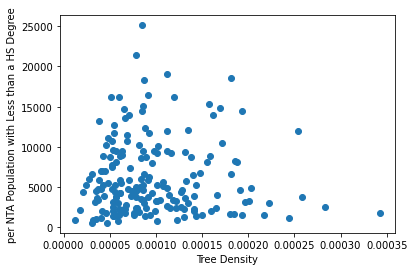

In [438]:
plt.scatter(demo_tree_nta['tree density'], demo_tree_nta['Less than HS Grad Estimate'])
plt.ylabel('per NTA Population with Less than a HS Degree')
plt.xlabel('Tree Density')
plt.show()

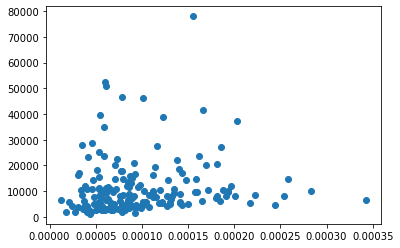

In [439]:
plt.scatter(demo_tree_nta['tree density'], demo_tree_nta['Bachelor or Higher Estimate'])

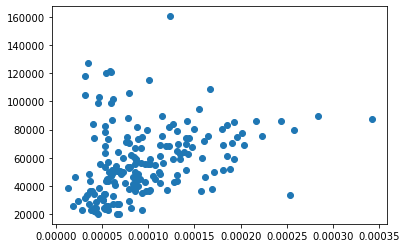

In [440]:
plt.scatter(demo_tree_nta['tree density'], demo_tree_nta['Median HH Income Estimate'])

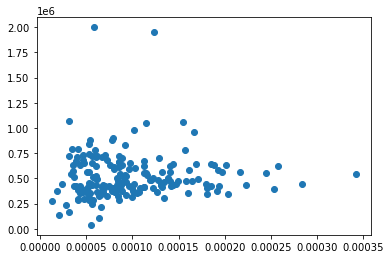

In [441]:
plt.scatter(demo_tree_nta['tree density'], demo_tree_nta['Median House Value Estimate'])

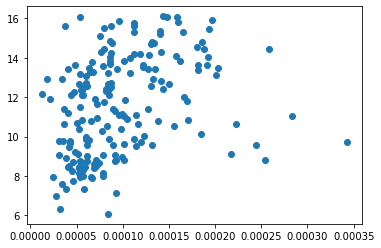

In [442]:
plt.scatter(demo_tree_nta['tree density'], demo_tree_nta['tree_dbh'])

In [489]:
demo_tree_nta[['tree_dbh', 'tree density', 'Less than HS Grad Estimate', 'Bachelor or Higher Estimate',
                         'Median HH Income Estimate', 'Median House Value Estimate']].corr()

,tree_dbh,tree density,Less than HS Grad Estimate,Bachelor or Higher Estimate,Median HH Income Estimate,Median House Value Estimate
tree_dbh,1.000000,0.331893,-0.145338,-0.125503,0.115348,-0.109751
tree density,0.331893,1.000000,-0.006603,0.109268,0.301378,0.044866
Less than HS Grad Estimate,-0.145338,-0.006603,1.000000,-0.025197,-0.551178,-0.165868
Bachelor or Higher Estimate,-0.125503,0.109268,-0.025197,1.000000,0.564113,0.571660
Median HH Income Estimate,0.115348,0.301378,-0.551178,0.564113,1.000000,0.601673
Median House Value Estimate,-0.109751,0.044866,-0.165868,0.571660,0.601673,1.000000


In [490]:
features = demo_tree_nta[['Less than HS Grad Estimate', 'Bachelor or Higher Estimate',
                         'Median HH Income Estimate', 'Median House Value Estimate']].to_numpy()

In [491]:
target = demo_tree_nta[['tree density']].to_numpy()

In [492]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=11)

## Regression Model

In [493]:
regr = linear_model.LinearRegression()

In [494]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [495]:
print('MULTIPLE REGRESSION MODEL')
print()
print('Model Parameters or coefficient values for "a":')
print(regr.coef_)
print('Intercept or coefficient value for "b":')
print(regr.intercept_)
print()
print('MODEL ACCURACY:')
print(regr.score(X_train, y_train))
print()
print('MODEL EQUATION:')
print('AVERAGE_VALUE = (Less than HS Grad * -5.21342606e-05) + (Bachelor or Higher * -4.64181608e-05) + (Median HH Income * 1.59033071e-05) + (Median House Value * -1.41944897e-06) + 10.76991968')

MULTIPLE REGRESSION MODEL

Model Parameters or coefficient values for "a":
[[ 4.29780326e-09 -8.53829496e-10  1.52522191e-09 -5.90933448e-11]]
Intercept or coefficient value for "b":
[2.09581922e-05]

MODEL ACCURACY:
0.17407939182562981

MODEL EQUATION:
AVERAGE_VALUE = (Less than HS Grad * -5.21342606e-05) + (Bachelor or Higher * -4.64181608e-05) + (Median HH Income * 1.59033071e-05) + (Median House Value * -1.41944897e-06) + 10.76991968


In [496]:
mean_squared_error(y_test,y_pred)

2.8376344060796472e-09

In [498]:
regr.score(X_train, y_train)

0.17407939182562981